# Opentrons Mass Balance Automation 

## Aniket Chitre, Daniil Bash - AMDM Group

### 0. Import Packages

In [1]:
%matplotlib notebook
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import time
import serial
import csv

### 1. Set Serial Port for Mass Balance

Find the port number on Windows through Device Manager or on Mac through running this command (`ls /dev/tty.*`) on the Terminal

In [2]:
#port = '/dev/tty.usbserial-14130'
port = 'COM3'

### 2. Real-time Data

In [3]:
def get_mass(port):
    balance = serial.Serial(port, 9600, xonxoff=True) # check COM port and xonxoff (handshake) = True default for MT balance
    balance.write('S\r\n'.encode('utf-8'))
    time.sleep(1)
    result  = balance.read_until('\r\n'.encode('utf-8'))
    value = str(result[7:14].decode("utf-8"))
    if (value.strip() != '-------') and (value.strip() != ''):
        return (True,float(value))
    return (False,-1)

In [4]:
x = [] #store time here 
mass = [] #store mass here
i = 0

while True:
    x.append(i*2)
    
    status, val = get_mass(port)
    if status == True:
        curr_val = val
    else:
        curr_val = mass[-1]
        
    print(curr_val)
    mass.append(curr_val)
    
    time.sleep(1)
    i += 1

0.002
0.002
0.0
0.0
0.002
0.002
0.0
0.0
-0.001
-0.001
0.004
0.004
0.004
0.0
0.004
0.0
0.0
0.0
-0.001
0.002
0.0
0.0
0.0
0.0
0.0
-0.005
0.0
0.002
0.0
0.0
0.001
0.001
-0.003
0.003
0.001
0.002
0.0
0.0
-0.003
-0.003
-0.003
-0.004
-0.004
-0.004
-0.004
-0.001
0.0
0.0
-0.002
-0.002
-0.001
0.0
-0.001
-0.001
0.0
0.0
0.0
0.0
0.003
0.002
0.004
0.002
0.002
0.002
0.002
0.0
0.002
0.002
-0.001
-0.001
0.0
-0.002
0.0
-0.001
-0.001
-0.001
0.003
0.0
-0.001
0.003
0.003
0.007
0.004
0.002
0.003
0.003
0.0
0.0
0.0
-0.001
0.0
0.0
0.002
0.003
0.002
0.002
0.002
-0.001
0.0
0.0
0.0
0.0
0.0
0.0
-0.001
-0.002
-0.001
-0.003
0.002
0.0
0.0
0.0
0.001
-0.002
0.0
0.001
0.0
0.0
-0.001
0.0
-0.001
-0.001
-0.001
0.0
-0.001
0.0
-0.001
-0.001
-0.004
-0.002
-0.002
0.0
0.0
0.001
-0.002
0.982
0.982
0.983
0.983
1.984
1.984
1.985
1.984
2.983
2.983
2.988
2.988
3.977
3.976
3.976
3.976
4.968
4.969
4.969
4.969
5.958
5.958
5.958
5.959
6.955
6.955
6.953
7.71
7.71
7.71
8.472
8.471
8.472
8.47
9.455
9.455
9.454
9.456
10.446
10.446
10.449
10.4

59.923
59.921
59.921
59.921
59.918
59.918
59.918
59.918
59.919
59.919
59.918
59.921
59.92
59.918
59.92
59.92
59.916
59.916
59.918
59.919
59.918
59.918
59.918
59.918
59.917
59.915
59.913
59.914
59.919
59.917
59.917
59.917
59.917
59.912
59.911
59.912
59.912
59.912
59.912
59.914
59.915
59.916
59.916
59.914
59.912
59.912
59.911
59.91
59.911
59.91
59.91
59.909
59.909
59.909
59.909
59.91
59.909
59.909
59.909
59.909
59.909
59.91
59.91
59.909
59.908
59.908
59.906
59.905
59.906
59.905
59.905
59.905
59.906
59.905
59.902
59.902
59.905
59.905
59.903
59.903
59.903
59.903
59.903
59.9
59.902
59.901
59.902
59.903
59.902
59.902
59.902
59.902
59.9
59.9
59.898
59.9
59.899
59.897
59.898
59.9
59.901
59.901
59.898
59.898
59.898
59.898
59.897
59.897
59.896
59.896
59.896
59.896
59.896
59.896
59.894
59.897
59.895
59.895
59.896
59.897
59.897
59.897
59.89
59.893
59.895
59.893
59.891
59.893
59.894
59.888
59.888
59.89
59.89
59.89
59.89
59.89
59.889
59.889
59.889
59.891
59.89
59.891
59.893
59.891
59.89
59.89
59.887

KeyboardInterrupt: 

In [5]:
results = {'Time': x[:-1], 'Mass': mass}

In [6]:
mass_df = pd.DataFrame(results)
mass_df

,Time,Mass
0,0,0.002
1,2,0.002
2,4,0.000
3,6,0.000
4,8,0.002
...,...,...
1439,2878,59.871
1440,2880,59.883
1441,2882,59.873
1442,2884,59.872


<IPython.core.display.Javascript object>


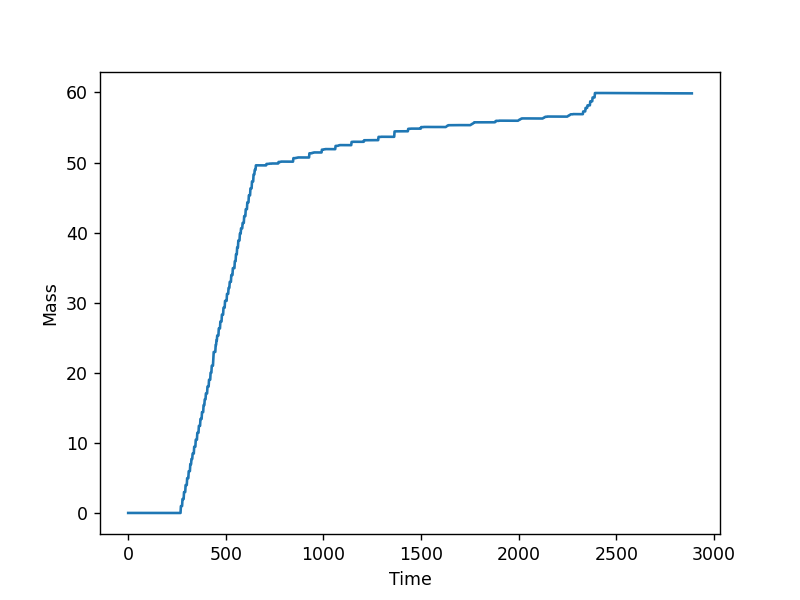

In [7]:
sns.lineplot(x='Time', y='Mass', data=mass_df);

In [8]:
mass_df.to_csv('MassProfile_011222_run1.csv')